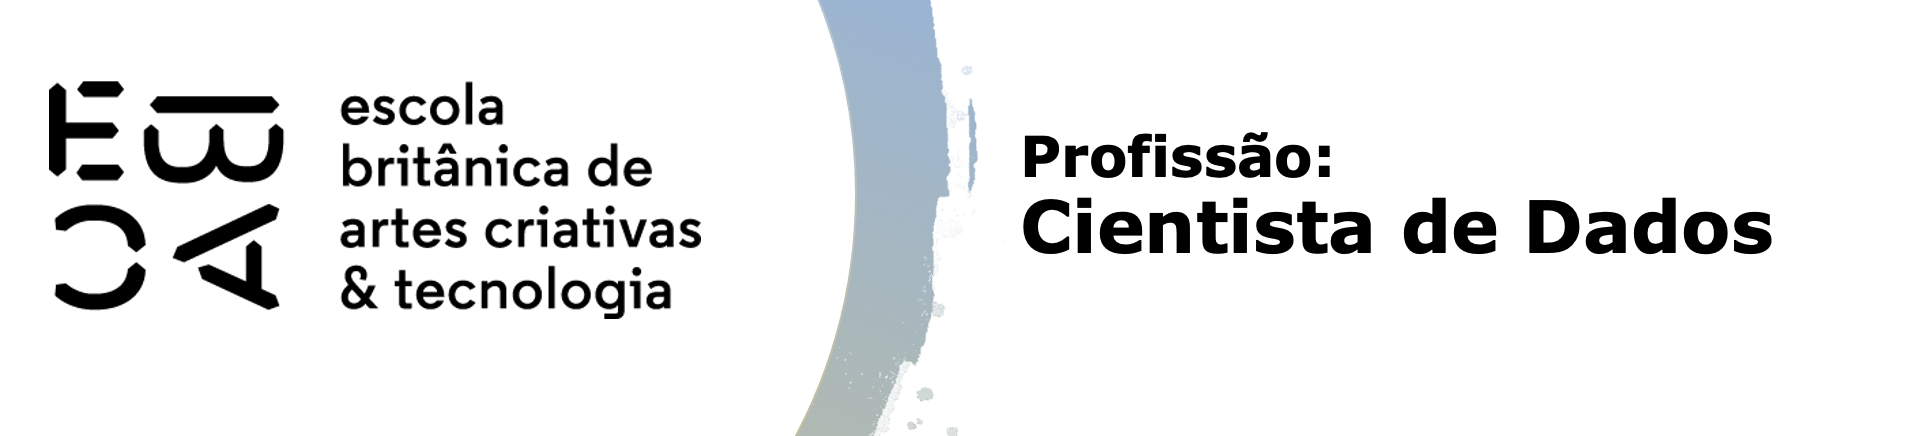

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [133]:
# Carrega as bases lidas na tarefa passada

base_X_train = pd.read_csv('base_X_train.csv')
base_X_test = pd.read_csv('base_X_test.csv')

In [134]:
# considerar a leitura dos índices

base_X_train.set_index(['index', 'id'], inplace=True)
base_X_test.set_index(['index', 'id'], inplace=True)

In [135]:
# faz a leitura dos nomes das atividades

activity_labels = pd.read_csv('activity_labels.txt', delim_whitespace=True, header=None)
activity_labels = dict(activity_labels.to_dict(orient='split')['data'])

In [136]:
# faz a leitura da variável resposta

base_y_train = pd.read_csv('y_train.txt', header=None)
base_y_test = pd.read_csv('y_test.txt', header=None)

In [137]:
# substitui a ID da atividade pelo nome

base_y_train.replace(activity_labels, inplace=True)
base_y_test.replace(activity_labels, inplace=True)

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [138]:
# 3 melhores variáveis identificadas no exercício anterior.
variaveis_relevantes = ['tGravityAcc-min()-X', 'tBodyAcc-std()-X', 'tGravityAcc-mean()-Y']

In [139]:
# separando 20% da base para teste e usando as 3 melhores variáveis para treino
X_train, X_test, y_train, y_test = train_test_split(
    base_X_train[variaveis_relevantes], 
    base_y_train, 
    test_size=0.20,
    random_state=2360873
)

In [140]:
%%time

# obtendo os ccp_alphas
clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20)
caminho = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

CPU times: user 30.7 ms, sys: 9 µs, total: 30.7 ms
Wall time: 26.6 ms


In [141]:
ccp_alphas = np.unique( ccp_alphas[ ccp_alphas >= 0 ] )

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [142]:
# criando os parâmetros de configuração que serão usados no GridSearchCV
# decidi usar todos os ccp_alphas e não apenas os 10 primeiros

clf = DecisionTreeClassifier(random_state=2360873)
grid_parametros = {'ccp_alpha': ccp_alphas}

In [143]:
%%time
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros, cv=10)
grid.fit(X_train, y_train) 

CPU times: user 19.7 s, sys: 0 ns, total: 19.7 s
Wall time: 19.7 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 8.02431750e-06, 8.19612971e-06, 8.90681047e-06,
       9.44661717e-06, 1.13359406e-05, 1.34614295e-05, 1.36367998e-05,
       1.37992838e-05, 6.86004342e-05, 7.82706412e-05, 8.13371340e-05,
       8.49245606e-05, 9.80805295e-05, 1.15255218e-04, 1.17577210e-04,
       1.212...
       1.85270994e-03, 1.91675232e-03, 1.95228251e-03, 2.02090678e-03,
       2.09272661e-03, 2.52943604e-03, 2.57552277e-03, 2.60128636e-03,
       2.72597543e-03, 3.05786878e-03, 3.25613775e-03, 3.67658168e-03,
       3.88591501e-03, 3.97281354e-03, 4.96689149e-03, 5.36807424e-03,
       6.58154513e-03, 7.93599651e-03, 9.57885203e-03, 4.34237315e-02,
       7.50581979e-02, 1.10203812e-01, 1.66421536e-01, 1.86947068e-01])})

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [144]:
# Obtenha a árvore na melhor configuração treinada em toda a base de treino

grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.00029255878189230215, random_state=2360873)

In [145]:
# os melhores parâmetros

grid.best_params_

{'ccp_alpha': 0.00029255878189230215}

In [146]:
# Calcule a acurácia dessa árvore na base de testes

melhor_arvore = DecisionTreeClassifier(
    random_state=2360873,
    ccp_alpha=grid.best_params_['ccp_alpha']
)

melhor_arvore.fit(
    X_train, 
    y_train
)

acuracia_teste = melhor_arvore.score(
    X_test, 
    y_test
)

print(f'Acurácia da base de teste: {acuracia_teste}')

Acurácia da base de teste: 0.9048266485384092


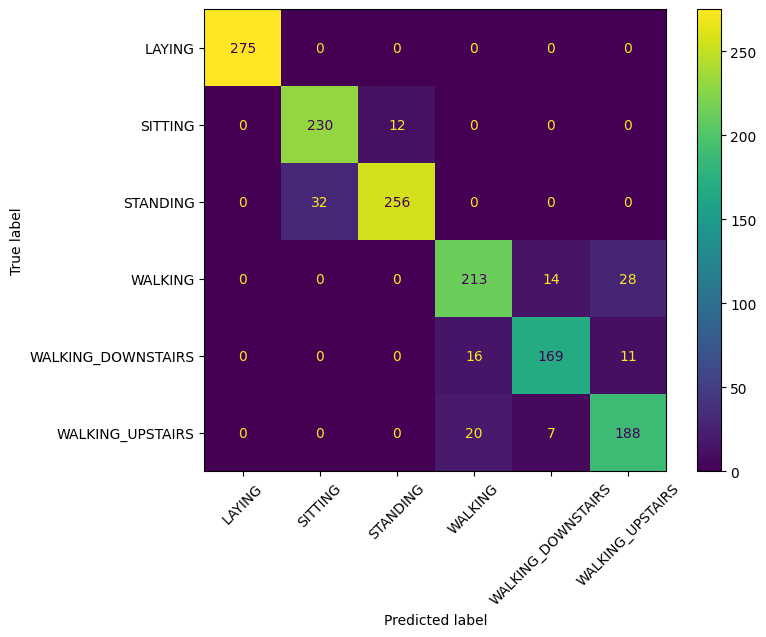

In [147]:
previsoes = melhor_arvore.predict(X_test)
cm = confusion_matrix(y_test, previsoes, labels=melhor_arvore.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=melhor_arvore.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
cmd.plot(ax=ax)
plt.xticks(rotation=45)
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

**A classe com maior erro foi a WALKING com 42 erros ao todo**
<br>

In [151]:
# copiando a base de treinamento
base_y_train_walking = base_y_train.copy()

In [152]:
# sobre a cópia da base de treinamento, criamos a variável binária para identificar se é ou não WALKING
base_y_train_walking[0] = np.where((base_y_train_walking[0] == 'WALKING'), 1, 0)

In [153]:
# árvore para classificar se é ou não WALKING
dtc = DecisionTreeClassifier(random_state=2360873, max_depth=4, min_samples_leaf=20)
dtc.fit(base_X_train, base_y_train_walking)

# recuperando o índice das variáveis mais relevantes para a atividade WALKING
maiores_importancias = np.argsort(dtc.feature_importances_)[::-1]

# considerando as 3 variáveis com maior importância
maiores_importancias = maiores_importancias[:3]

# recuperando o nome das 3 variáveis com maior importância
relevantes_walking = [base_X_train.columns[indice] for indice in maiores_importancias]

relevantes_walking

['tBodyAcc-entropy()-X', 'tBodyAcc-correlation()-X,Y', 'tGravityAcc-std()-X']

In [154]:
# faz a união das 3 variáveis mais importantes do exercício anterior com as
# 3 variáveis mais importantes para determinar a atividade WALKING

relevantes = variaveis_relevantes + relevantes_walking

In [155]:
# separa os dados de treino e teste considerando as variáveis mais importantes
X_train, X_test, y_train, y_test = train_test_split(
    base_X_train[relevantes], 
    base_y_train, 
    test_size=0.20,
    random_state=2360873
)

In [156]:
# obtendo os ccp_alphas
clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20)
caminho = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [157]:
ccp_alphas = np.unique( ccp_alphas[ ccp_alphas >= 0 ] )

In [158]:
# criando os parâmetros de configuração que serão usados no GridSearchCV
clf = DecisionTreeClassifier(random_state=2360873)
grid_parametros = {'ccp_alpha': ccp_alphas}

In [159]:
grid2 = GridSearchCV(estimator = clf, param_grid=grid_parametros, cv=10)
grid2.fit(X_train, y_train) 

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 8.12576273e-06, 8.90681047e-06, 9.27486049e-06,
       1.00157928e-05, 1.12398733e-05, 1.18512106e-05, 1.28566156e-05,
       1.34979499e-05, 1.36367998e-05, 1.37992838e-05, 1.63168842e-05,
       2.27031960e-05, 2.94430135e-05, 3.90089721e-05, 5.78044858e-05,
       7.389...
       1.85270994e-03, 1.87987682e-03, 2.25555808e-03, 2.38169008e-03,
       2.52943604e-03, 2.57552277e-03, 2.60128636e-03, 3.02730427e-03,
       3.26208506e-03, 3.47163181e-03, 4.10253088e-03, 4.44936009e-03,
       4.76920869e-03, 5.69770018e-03, 6.58154513e-03, 6.66732455e-03,
       1.42832100e-02, 1.49305759e-02, 1.89391884e-02, 4.64574200e-02,
       7.50581979e-02, 1.10203812e-01, 1.66421536e-01, 1.86947068e-01])})

In [160]:
# Calculando a nova a acurácia

melhor_arvore = DecisionTreeClassifier(
    random_state=2360873,
    ccp_alpha=grid2.best_params_['ccp_alpha']
)

melhor_arvore.fit(
    X_train, 
    y_train
)

acuracia_teste = melhor_arvore.score(
    X_test, 
    y_test
)

print(f'Acurácia da base de teste: {acuracia_teste}')

Acurácia da base de teste: 0.9129843643779741


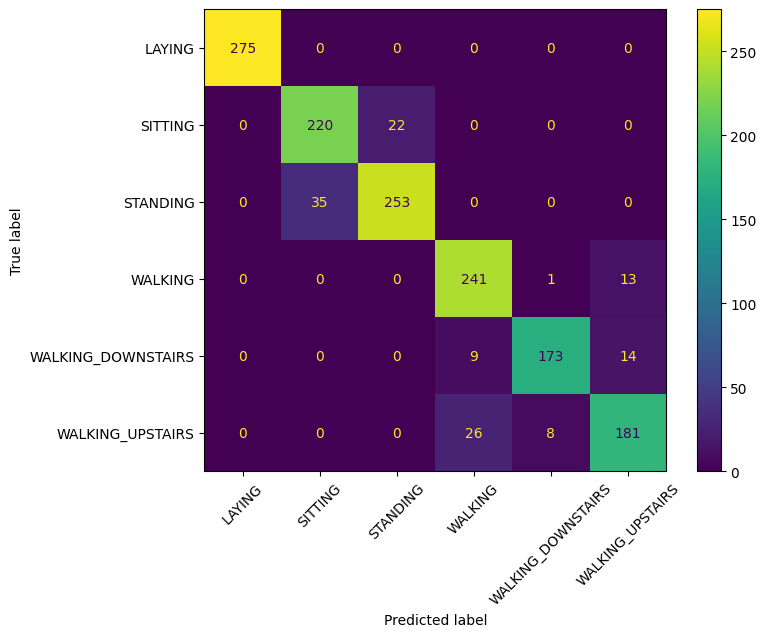

In [161]:
previsoes = melhor_arvore.predict(X_test)
cm = confusion_matrix(y_test, previsoes, labels=melhor_arvore.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=melhor_arvore.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
cmd.plot(ax=ax)
plt.xticks(rotation=45)
plt.show()

**Conclusão:**
- A acurácia anterior era de 0.90
- Com as novas variáveis a acurácia foi de 0.91
- A quantidade de erros para a atividade WALKING caiu de 42 para 14